<a href="https://colab.research.google.com/github/Udinkosd/Data-Mining-2024/blob/main/Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Gaji Mahasiswa

#**Import Library**

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import seaborn as sns
from tabulate import tabulate

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari analisis dataset ini adalah untuk memperoleh wawasan tentang faktor-faktor yang memengaruhi gaji karyawan dalam perusahaan. Dengan memeriksa hubungan antara berbagai atribut seperti usia, jenis kelamin, tingkat pendidikan, jabatan pekerjaan, dan tahun pengalaman dengan gaji, perusahaan bertujuan untuk membuat keputusan yang berbasis informasi mengenai strategi kompensasi, akuisisi bakat, dan retensi karyawan.

##**Assess Situation**

Perusahaan perlu memahami faktor-faktor yang berkontribusi terhadap gaji karyawan untuk memastikan praktik kompensasi yang adil, mengidentifikasi area yang perlu ditingkatkan dalam struktur gaji, dan mengatasi potensi disparitas atau bias yang mungkin ada dalam organisasi.

##**Data Mining Goals**

1. Mengidentifikasi faktor-faktor kunci yang memengaruhi gaji karyawan.
2. Menjelajahi hubungan antara berbagai atribut seperti usia, jenis kelamin, tingkat pendidikan, jabatan pekerjaan, dan tahun pengalaman dengan gaji.
3. Mendeteksi pola atau tren dalam distribusi gaji di dalam perusahaan.
4. Mengembangkan model prediktif untuk memperkirakan rentang gaji berdasarkan karakteristik karyawan.

##**Project Plan**

1. Pengumpulan Data: Mengumpulkan dataset yang berisi informasi tentang gaji karyawan, termasuk usia, jenis kelamin, tingkat pendidikan, jabatan pekerjaan, tahun pengalaman, dan gaji.
2. Pra-Pemrosesan Data: Membersihkan data dengan menangani nilai yang hilang, mengkodekan variabel kategorikal, dan menstandarisasi fitur numerik jika diperlukan.
3. Analisis Data Eksploratif (EDA): Melakukan analisis eksploratif untuk memahami distribusi variabel, mengidentifikasi pencilan, dan memvisualisasikan hubungan antara berbagai atribut dengan gaji.
4. Interpretasi dan Wawasan: Menginterpretasikan hasil untuk mendapatkan wawasan yang dapat diambil tentang faktor-faktor yang memengaruhi gaji karyawan dan menyampaikan temuan kepada pemangku kepentingan yang relevan untuk tujuan pengambilan keputusan.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

In [113]:
url = 'https://raw.githubusercontent.com/Udinkosd/Data-Mining-2024/main/Salary%20Dataset.csv'
df = pd.read_csv(url)

Sumber data ini merupakan platform Kaggle, dapat diakses melalui tautan berikut: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer/data

##**Describe Data**

####Informasi Dasar

In [136]:
print("Pratinjau kumpulan data:")
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

row_count, column_count = df.shape
print("Number of rows:", row_count)
print("Number of columns:", column_count)

Pratinjau kumpulan data:
+---+------+--------+-----------------+-------------------+---------------------+----------+
|   | Age  | Gender | Education Level |     Job Title     | Years of Experience |  Salary  |
+---+------+--------+-----------------+-------------------+---------------------+----------+
| 0 | 32.0 |  Male  |   Bachelor's    | Software Engineer |         5.0         | 90000.0  |
| 1 | 28.0 | Female |    Master's     |   Data Analyst    |         3.0         | 65000.0  |
| 2 | 45.0 |  Male  |       PhD       |  Senior Manager   |        15.0         | 150000.0 |
| 3 | 36.0 | Female |   Bachelor's    |  Sales Associate  |         7.0         | 60000.0  |
| 4 | 52.0 |  Male  |    Master's     |     Director      |        20.0         | 200000.0 |
+---+------+--------+-----------------+-------------------+---------------------+----------+
Number of rows: 375
Number of columns: 6


Dataset ini menampilkan beberapa atribut seperti usia, jenis kelamin, tingkat pendidikan, judul pekerjaan, tahun pengalaman, dan gaji.
Terdapat 375 baris data dan 6 kolom atribut.

####Informasi Lanjutan

In [153]:
# Pratinjau data
print("Informasi lengkap tentang dataset:")
print(df.info())
print()

# Tampilkan jumlah responden untuk setiap tingkat pendidikan dan gender
gender_education_counts = df.groupby(['Gender', 'Education Level']).size()
print("Jumlah responden untuk setiap tingkat pendidikan dan gender:")
print(gender_education_counts)
print()

# Gaji tertinggi, terendah, dan rata-rata serta umur tertua
max_salary = df['Salary'].max()
min_salary = df['Salary'].min()
avg_salary = df['Salary'].mean()
max_age = df['Age'].max()
min_age = df['Age'].min()
avg_age = df['Age'].mean()
max_experience = df['Years of Experience'].max()
min_experience = df['Years of Experience'].min()
avg_experience = df['Years of Experience'].mean()

# Mengonversi angka menjadi format tanpa desimal dengan pemisah ribuan
max_salary_str = '{:,.0f}'.format(max_salary)
min_salary_str = '{:,.0f}'.format(min_salary)
avg_salary_str = '{:,.0f}'.format(avg_salary)
max_age_str = int(max_age)
min_age_str = int(min_age)
avg_age_str = int(avg_age)
max_experience_str = '{:,.0f}'.format(max_experience)
min_experience_str = '{:,.0f}'.format(min_experience)
avg_experience_str = '{:,.2f}'.format(avg_experience)

print("Umur tertua:", max_age_str)
print("Umur termuda:", min_age_str)
print("Umur rata-rata:", avg_age_str)
print()
print("Gaji tertinggi:", max_salary_str)
print("Gaji terendah:", min_salary_str)
print("Gaji rata-rata:", avg_salary_str)
print()
print("Pengalaman kerja tertinggi:", max_experience_str)
print("Pengalaman kerja terendah:", min_experience_str)
print("Rata-rata pengalaman kerja:", avg_experience_str)

Informasi lengkap tentang dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None

Jumlah responden untuk setiap tingkat pendidikan dan gender:
Gender  Education Level
Female  Bachelor's         103
        Master's            50
        PhD                 26
Male    Bachelor's         121
        Master's            48
        PhD                 25
dtype: int64

Umur tertua: 53
Umur termuda: 23
Umur rata-rata: 37

Gaji tertinggi: 250,000
Gaji terendah: 350
Gaji rata-rata: 100,5

1. Age: Menunjukkan usia responden. Ada 373 nilai non-null yang berupa bilangan pecahan (float64).
2. Gender: Menggambarkan jenis kelamin responden. Ada 373 nilai non-null yang berupa objek (string atau teks).
3. Education Level: Merupakan tingkat pendidikan responden. Terdapat 373 nilai non-null yang berupa objek (string).
4. Job Title: Menyatakan judul pekerjaan dari responden. Terdapat 373 nilai non-null yang berupa objek (string).
5. Years of Experience: Menunjukkan tahun-tahun pengalaman kerja responden. Ada 373 nilai non-null yang berupa bilangan pecahan (float64).
6. Salary: Merupakan gaji responden. Terdapat 373 nilai non-null yang berupa bilangan pecahan (float64).

Terdapat dua jenis informasi dalam dataset ini. Pertama, jumlah responden untuk setiap tingkat pendidikan dan gender, yang menunjukkan distribusi jumlah responden berdasarkan tingkat pendidikan dan jenis kelamin. Misalnya, ada 103 wanita dengan gelar sarjana dan 121 pria dengan gelar sarjana.

Kedua, statistik tentang umur, gaji, dan pengalaman kerja dari seluruh dataset. Umur tertua responden adalah 53 tahun, yang tertua 23 tahun, dengan umur rata-rata sekitar 37 tahun. Gaji tertinggi mencapai $250,000  dan yang terendah hanya $350, dengan rata-rata sekitar $100,577. Pengalaman kerja tertinggi adalah 25 tahun, terendah 0 tahun, dan rata-ratanya adalah sekitar 10.03 tahun.

####Informasi Statistik Deskriptif

In [139]:
# Menampilkan statistik deskriptif dari kolom numerik
print(df.describe())
print()

              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000



Statistik deskriptif ini memberikan gambaran tentang distribusi data dalam kolom-kolom numerik pada dataset. Berikut adalah penjelasan untuk setiap statistik:

1. Count: Menunjukkan jumlah total data yang kita miliki untuk setiap kolom.
2. Mean: Merupakan rata-rata usia, pengalaman kerja, dan gaji dari seluruh data.
3. Std(Standard Deviation): Menunjukkan seberapa jauh rata-rata usia, pengalaman kerja, dan gaji berbeda dari nilai-nilai individu dalam setiap kolom.
4. Min: Merupakan nilai minimum dari usia, pengalaman kerja, dan gaji yang ada dalam data.
5. 25% (Q1): Menunjukkan nilai usia, pengalaman kerja, dan gaji di bawahnya terdapat 25% dari data.
6. 50% (Q2): Merupakan median usia, pengalaman kerja, dan gaji, yang berarti 50% data berada di atasnya dan 50% di bawahnya.
7. 75% (Q3): Menunjukkan nilai usia, pengalaman kerja, dan gaji di bawahnya terdapat 75% dari data.
8. Max: Merupakan nilai maksimum dari usia, pengalaman kerja, dan gaji yang ada dalam data.

Dari data tersebut, kita dapat melihat bahwa usia rata-rata responden adalah sekitar 37 tahun, dengan usia termuda 23 tahun dan tertua 53 tahun. Pendidikan responden bervariasi, dengan mayoritas memiliki gelar sarjana atau gelar master. Jabatan responden juga bervariasi, mulai dari Software Engineer, Data Analyst, hingga Director. Rata-rata pengalaman kerja responden adalah sekitar 10 tahun, dan rata-rata gaji adalah sekitar USD100,577, dengan sebagian besar responden memiliki gaji antara USD55,000 dan USD140,000.

##**Exploratory Data Analysis**

####Informasi Statistik Visual Gender dalam Dataset

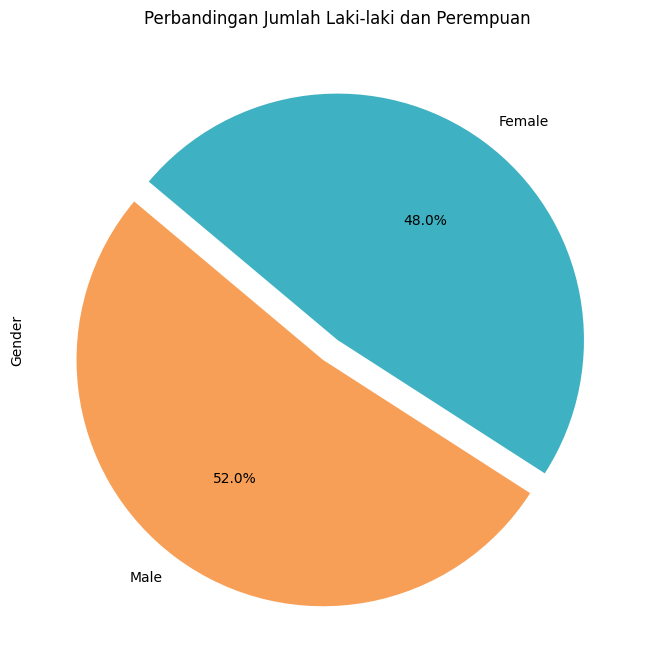

In [117]:
# Menghitung jumlah gender
gender_counts = df['Gender'].value_counts()

# Tentukan warna dan explode
colors = ['#f89f57', '#3eb1c2']
explode = (0.1, 0)

# Plot pie chart menggunakan pandas
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

plt.title('Perbandingan Jumlah Laki-laki dan Perempuan')

plt.show()

Dari pie chart tersebut, terlihat bahwa proporsi lulusan laki-laki dan perempuan memiliki perbedaan sekitar 4%. Persentase lulusan laki-laki sebesar 52%, sedangkan persentase lulusan perempuan sebesar 48%. Hal ini mencerminkan variasi gender dalam data, yang meliputi lulusan sarjana maupun gelar master, serta beragam tingkat pengalaman.n

####Informasi Statistik Visual Usia dalam Dataset

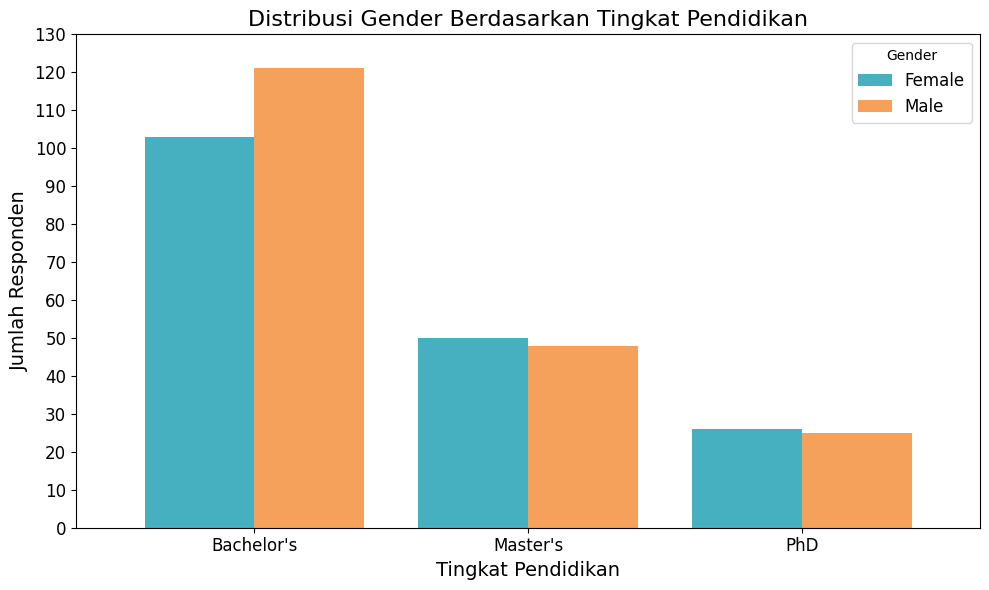

Gender           Female  Male
Education Level              
Bachelor's          103   121
Master's             50    48
PhD                  26    25


In [118]:
# Hitung jumlah responden berdasarkan tingkat pendidikan dan gender
gender_education_counts = df.groupby(['Education Level', 'Gender']).size().unstack()

# Plot column chart
ax = gender_education_counts.plot(kind='bar', figsize=(10, 6), width=0.8, color=['#46b0c1', '#f5a15b'])

# Atur label dan judul
plt.title('Distribusi Gender Berdasarkan Tingkat Pendidikan', fontsize=16)
plt.xlabel('Tingkat Pendidikan', fontsize=14)
plt.ylabel('Jumlah Responden', fontsize=14)

# Atur label sumbu x agar horizontal
plt.xticks(rotation=0, fontsize=12)

# Atur label sumbu y agar lebih jelas
plt.yticks(np.arange(0, gender_education_counts.max().max() + 10, 10), fontsize=12)

# Tambahkan legend
plt.legend(title='Gender', fontsize=12)

# Atur layout
plt.tight_layout()

# Tampilkan plot
plt.show()
print(gender_education_counts)

Berdasarkan visualisasi data distribusi jenis kelamin, terlihat bahwa terdapat perbedaan yang signifikan antara jumlah laki-laki dan perempuan dalam dataset. Dari pie chart, terlihat bahwa sekitar 52% responden adalah laki-laki, sedangkan 48% sisanya adalah perempuan.

Selanjutnya, ketika melihat distribusi berdasarkan tingkat pendidikan, terlihat bahwa mayoritas responden memiliki gelar sarjana (Bachelor's), diikuti oleh gelar master (Master's) dan gelar doktor (PhD). Meskipun demikian, terdapat perbedaan kecil antara jumlah laki-laki dan perempuan dalam setiap tingkat pendidikan. Pada tingkat pendidikan sarjana, terdapat sedikit lebih banyak laki-laki daripada perempuan, sementara pada tingkat pendidikan master dan doktor, jumlah perempuan sedikit lebih banyak daripada laki-laki.

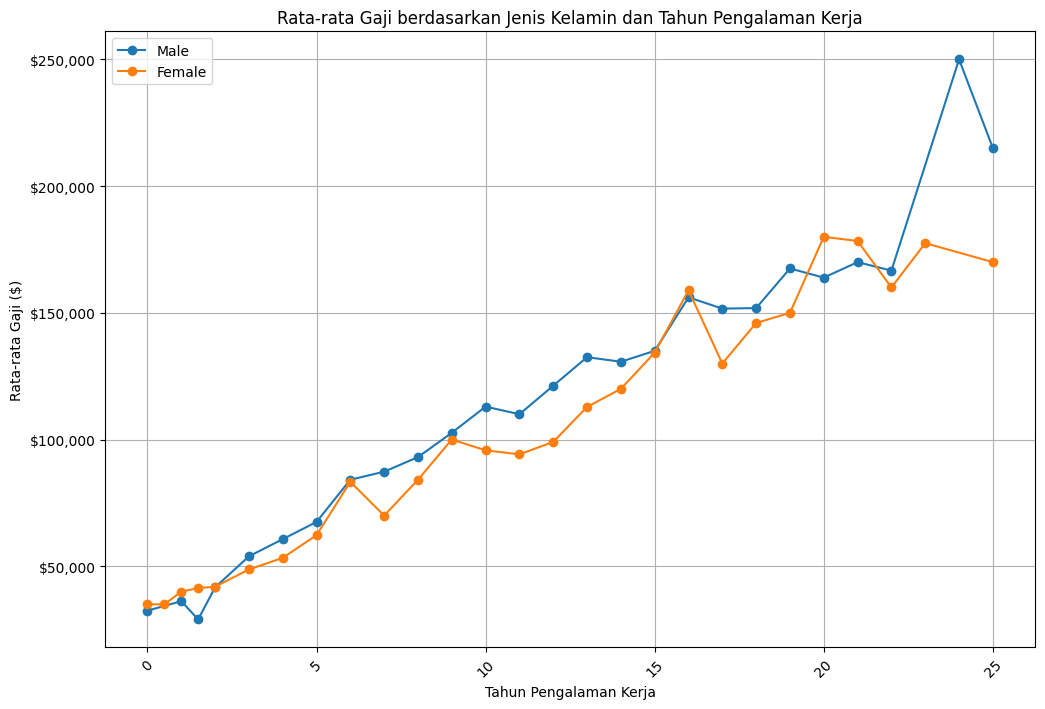

In [119]:
# Membuat plot line chart
plt.figure(figsize=(12, 8))

# Plot line chart untuk laki-laki
male_data = avg_salary.loc['Male']
male_data_filtered = male_data[male_data.index.isin(count_by_gender_experience['Male'][count_by_gender_experience['Male'] >= min_observation].index)]
plt.plot(male_data_filtered.index, male_data_filtered, marker='o', label='Male')

# Plot line chart untuk perempuan
female_data = avg_salary.loc['Female']
female_data_filtered = female_data[female_data.index.isin(count_by_gender_experience['Female'][count_by_gender_experience['Female'] >= min_observation].index)]
plt.plot(female_data_filtered.index, female_data_filtered, marker='o', label='Female')

plt.title('Rata-rata Gaji berdasarkan Jenis Kelamin dan Tahun Pengalaman Kerja')
plt.xlabel('Tahun Pengalaman Kerja')
plt.ylabel('Rata-rata Gaji ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Mengatur format sumbu Y menjadi format mata uang dolar
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()

Pada data di atas, terlihat bahwa rata-rata gaji berdasarkan pengalaman kerja menunjukkan variasi yang signifikan. Gaji tertinggi mencapai USD250K pertahun, sementara yang terendah berada di bawah USD50K pertahun. Data ini menggambarkan bahwa semakin tinggi pengalaman kerja seseorang, semakin tinggi pula gaji yang diterima, baik untuk perempuan maupun laki-laki. Selain itu, tidak terdapat perbedaan gaji yang signifikan antara jenis kelamin dalam dataset ini.

<Figure size 1200x800 with 0 Axes>

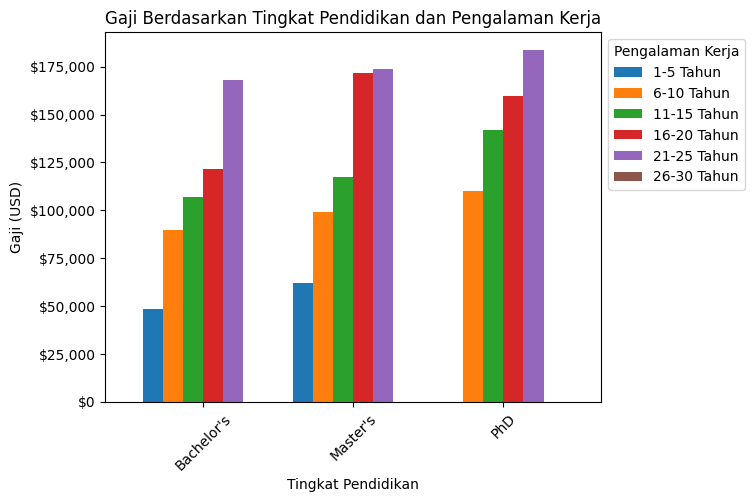

In [120]:
# Plot bar chart
plt.figure(figsize=(12, 8))
education_experience_salary.plot(kind='bar', stacked=False, width=0.8)
plt.title('Gaji Berdasarkan Tingkat Pendidikan dan Pengalaman Kerja')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Gaji (USD)')
plt.xticks(rotation=45)

# Mengatur format sumbu Y menjadi format mata uang dolar
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Menambahkan legend di luar chart
plt.legend(title='Pengalaman Kerja', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan data tersebut, kita dapat melihat bahwa setiap gelar memiliki peringkat gaji bagi para lulusannya. Pertama-tama, kita perhatikan lulusan sarjana, di mana dengan pengalaman kerja 1 hingga 5 tahun, gaji mereka mendekati USD50K per tahun. Kemudian, bagi mereka dengan pengalaman kerja lebih dari 6 tahun, gaji rata-rata sudah mencapai sekitar USD90K per tahun. Gaji tertinggi untuk lulusan sarjana adalah USD170K per tahun. Selanjutnya, lulusan magister dan doktor memiliki gaji per tahun yang tidak terlalu berbeda secara signifikan dengan tingkat pengalaman kerja yang sama. Meskipun demikian, terdapat beberapa responden yang telah mencapai gaji USD250K per tahun dengan gelar doktor dan waktu pengalaman kerja yang setara dengan gelar lainnya.

<ipython-input-121-871f3ad7c1a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


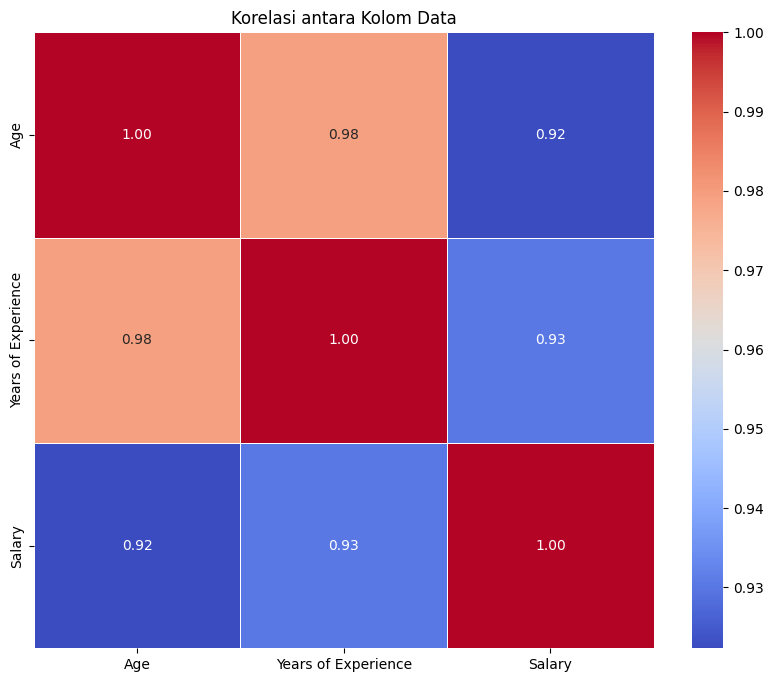

In [121]:
correlation_matrix = df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antara Kolom Data')
plt.show()

Berdasarkan korelasi yang diamati dalam data tersebut, dapat disimpulkan bahwa terdapat hubungan yang kuat antara beberapa variabel utama. Pertama, terdapat korelasi yang sangat tinggi antara usia seseorang dan jumlah tahun pengalaman kerja yang dimiliki. Hal ini menunjukkan bahwa semakin tua seseorang, semakin banyak pengalaman kerja yang mereka miliki. Selanjutnya, terdapat korelasi yang kuat antara usia dan tingkat gaji yang diterima seseorang. Artinya, semakin tua seseorang, cenderung semakin tinggi pula gaji yang mereka terima. Selain itu, korelasi antara jumlah tahun pengalaman kerja dan tingkat gaji juga cukup signifikan. Semakin lama seseorang memiliki pengalaman kerja, semakin besar kemungkinan mereka mendapatkan gaji yang lebih tinggi. Dengan demikian, dari korelasi ini dapat disimpulkan bahwa usia, tahun pengalaman, dan gaji saling terkait secara positif, dimana semakin tua dan berpengalaman seseorang, cenderung mendapatkan gaji yang lebih tinggi.

##**Verify Data Quality**

####Missing Values

In [122]:
# Mengecek apakah ada nilai kosong pada tiap kolom
missing_values = df.isnull().sum()

# Menampilkan kolom-kolom yang memiliki nilai kosong
print("Kolom dengan nilai kosong:")
print(missing_values[missing_values > 0])

Kolom dengan nilai kosong:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


Dari hasil pengecekan nilai kosong, terdapat beberapa kolom dalam dataset yang memiliki nilai kosong. Kolom-kolom tersebut meliputi usia responden, jenis kelamin, tingkat pendidikan, jabatan, tahun pengalaman kerja, gaji, dan interval pengalaman. Kehadiran nilai kosong dalam kolom-kolom ini bisa berdampak pada analisis yang bergantung pada informasi tersebut. Misalnya, ketiadaan nilai pada kolom usia atau gaji dapat memengaruhi pemahaman tentang demografi responden atau analisis kompensasi.

####Outliers Values

In [123]:
# Pilih kolom-kolom numerik
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Menghitung IQR untuk setiap kolom numerik
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mencari outlier values untuk setiap kolom numerik
outliers = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)

# Menampilkan outlier values untuk setiap kolom
print("Outlier Values:")
print(outliers.sum())


Outlier Values:
Age                    0
Years of Experience    0
Salary                 0
dtype: int64


Dalam dataset tersebut, tidak ditemukan outlier values dalam kolom Age, Years of Experience, dan Salary. Ini menunjukkan bahwa tidak ada nilai ekstrim atau tidak biasa dalam data untuk ketiga kolom tersebut.

####Duplicated Values

In [124]:
# Mencari nilai-nilai yang diduplikasi dalam dataset
duplicated_values = df[df.duplicated()]

# Menampilkan nilai-nilai yang diduplikasi
print("Duplicated Values:")
print(duplicated_values)


Duplicated Values:
      Age  Gender Education Level                              Job Title  \
195  28.0    Male      Bachelor's                Junior Business Analyst   
250  30.0  Female      Bachelor's           Junior Marketing Coordinator   
251  38.0    Male        Master's                   Senior IT Consultant   
252  45.0  Female             PhD                Senior Product Designer   
253  28.0    Male      Bachelor's  Junior Business Development Associate   
254  35.0  Female      Bachelor's               Senior Marketing Analyst   
255  44.0    Male      Bachelor's               Senior Software Engineer   
256  34.0  Female        Master's               Senior Financial Advisor   
257  35.0    Male      Bachelor's             Senior Project Coordinator   
258  50.0  Female             PhD                 Director of Operations   
260   NaN     NaN             NaN                                    NaN   
262  46.0    Male             PhD                  Senior Data Scient

Berdasarkan hasil pengecekan nilai duplikat dalam dataset, ditemukan bahwa beberapa baris memiliki nilai yang sama untuk setiap kolom, khususnya pada atribut yang berkaitan langsung dengan analisis gaji seperti 'Job Title', 'Years of Experience', dan 'Salary'. Dalam konteks dataset yang menunjukkan informasi gaji para lulusan, adanya duplikasi data seperti ini diharapkan dan tidak dianggap sebagai masalah yang mengganggu analisis.

####Inconsistent Values / Noise (Optional)